In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/Users/joby/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [26]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [27]:
train_labels.shape

(404,)

In [28]:
train_data[4]

array([  3.69311,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.376  ,
        88.4    ,   2.5671 ,  24.     , 666.     ,  20.2    , 391.43   ,
        14.65   ])

In [31]:
order = np.argsort(np.random.random(train_labels.shape))
order.shape
train_data = train_data[order]
train_labels = train_labels[order]

In [33]:
train_data[4]
order[4]

283

In [25]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [35]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

In [38]:
df = pd.DataFrame(train_data,columns=column_names)

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
1,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64
2,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
3,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
4,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98


# Data Normalization

In [40]:
mean = train_data.mean(axis=0)
std = train_data.mean(axis=0)
train_data= (train_data-mean)/std
test_data = (test_data-mean)/std


In [41]:
train_data[4]

array([-0.99831247,  0.56791721, -0.79197493, -1.        , -0.03472815,
        0.04913265, -0.0552182 ,  0.09350371, -0.89407446, -0.27075368,
       -0.17189824,  0.11871147, -0.60913024])

In [46]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64,activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model
    

In [47]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [73]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
    def printTest():
        print('hello')

In [64]:
EPOCHS = 500

In [74]:
history = model.fit(train_data,train_labels,epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

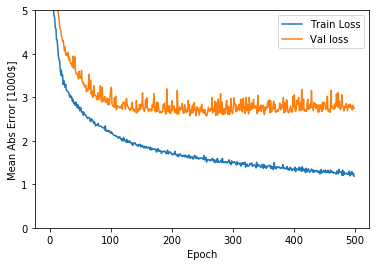

In [66]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0,5])
    plt.show()

plot_history(history)


....................................................................................................
...................................................

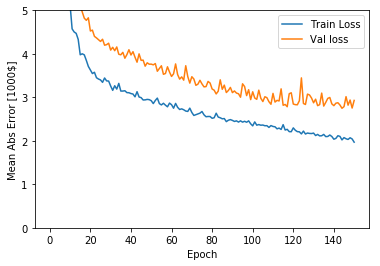

In [67]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [68]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[12.840533 19.635746 21.862364 33.294083 25.427122 20.493155 28.571693
 23.020914 20.290255 23.237297 19.15932  16.824457 17.153412 41.341465
 17.992588 20.528011 25.942007 21.199457 18.833595 26.954828 13.946778
 16.052032 21.592024 15.248514 20.629827 24.382698 29.640203 30.817333
 13.230897 20.39873  21.282816 15.819258 34.643906 24.63914  15.862593
 11.555142 14.1736   19.38601  19.67286  27.64905  28.696465 28.766907
 14.394029 40.155582 31.399475 25.04232  29.64117  18.880127 24.880177
 23.716822 34.324192 20.064434 12.521399 16.23425  35.436886 28.222145
 14.032993 46.086273 35.56035  24.383617 26.537527 16.854708 16.255297
 20.280739 24.083807 22.696383 13.96551  24.235851 15.672899 12.840906
 26.318457 30.319414 25.643654 16.4247   26.81237  18.881136 19.725967
 24.841375 36.504246 11.97881  21.77259  39.863758 15.569766 13.817843
 19.142702 18.021467 18.933393 21.066704 23.509426 32.783463 20.245901
 19.042292 26.024336 37.958443 36.641083 17.692091 38.052025 46.31296
 25.873

In [70]:
columns = ['Price']
df = pd.DataFrame(test_predictions,columns=columns)

In [72]:
df.head(10)

,Price
0,12.840533
1,19.635746
2,21.862364
3,33.294083
4,25.427122
5,20.493155
6,28.571693
7,23.020914
8,20.290255
9,23.237297
